## Statistical Learning Project

In [1]:
# Importing useful libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [65]:
#Imoprting tha data set
train_df = pd.read_excel('Data_Train.xlsx')
train_df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [3]:
train_df.describe()

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_df.shape

(10683, 11)

In [6]:
train_df.Duration.value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [75]:
train_df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

**There are 5 Source i.e the number of cities from which the flights depart.**

In [76]:
train_df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [80]:
train_df.Airline.nunique()

12

In [78]:
train_df.Route.nunique()

128

**There are 6 cities in destination where flights land.**
**There are 128 routes and 12 Different Airlines.**

# Exploratory Data Analysis (EDA)

<Figure size 864x864 with 0 Axes>

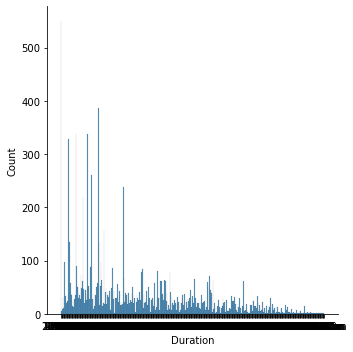

In [7]:
plt.figure(figsize=(12,12))
sns.displot(train_df['Duration'], bins=50)

Text(0, 0.5, 'Frequency')

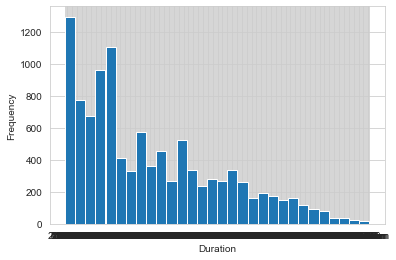

In [8]:
sns.set_style('whitegrid')
train_df['Duration'].hist(bins=30)
plt.xlabel('Duration')
plt.ylabel('Frequency')

In [9]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected = True)
cf.go_offline()

In [10]:
train_df.iplot(kind='bar',x='Duration',theme='solar')

In [11]:
train_df.isna().sum()
# Since we are having 2 null values in the whole data set so we will ignore those rows in cleaning of data

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
train_df.dropna(inplace=True)
train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

`Now there is no any NAN value presemt in the dataset`

In [13]:
train_df

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10682 rows x 11 columns]

<AxesSubplot:xlabel='Price', ylabel='Count'>

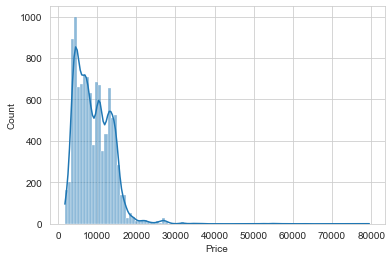

In [14]:
sns.histplot(train_df['Price'],kde=True,bins=100,shrink=1)

** we can see from the above graph that most of the flight fare lies between 8k to 12k**

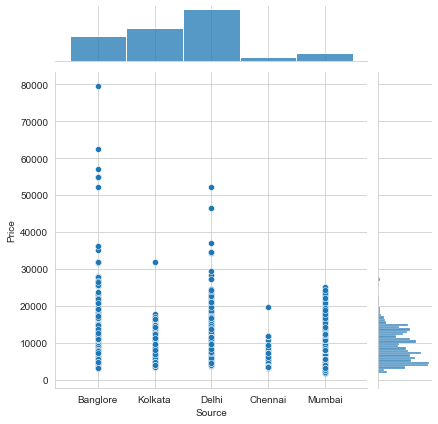

In [15]:
sns.jointplot(x='Source',y='Price',data=train_df)

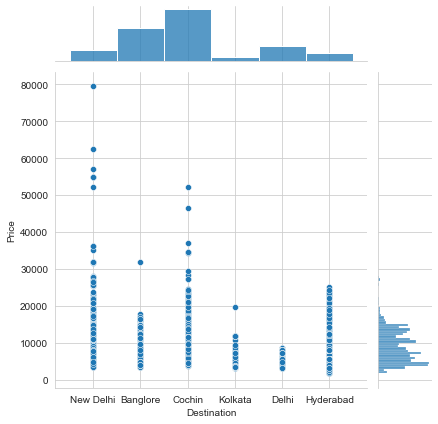

In [16]:
sns.jointplot(x='Destination',y='Price',data=train_df)

<Figure size 864x576 with 0 Axes>

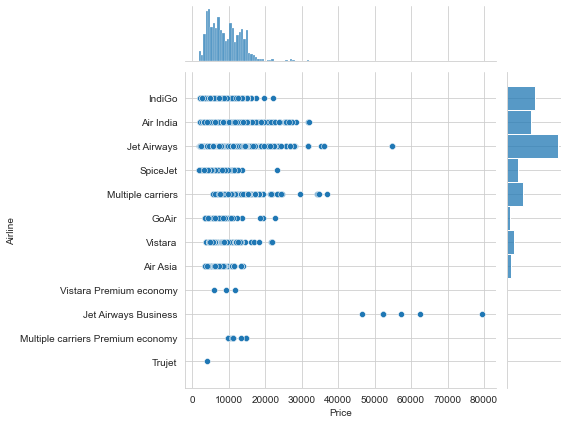

In [17]:
plt.figure(figsize=(12,8))
sns.jointplot(y='Airline',x="Price",data=train_df)

* from the above jointplots we can see that the maximum fare of flight is 80,000 INR whose source is Banglore and destination is New Delhi in Jet Airways Bussiness.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

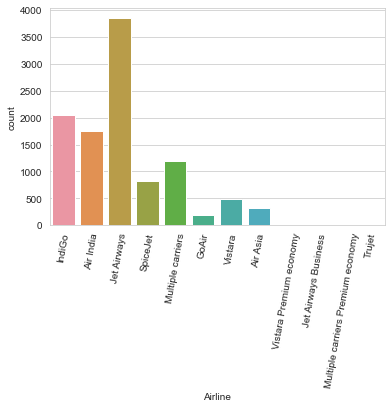

In [18]:
sns.countplot(x='Airline',data=train_df)
plt.xticks(rotation=80)

`from the above plot we can see that Jet Airways has highest number of flights in the given data set`

In [84]:
New_df = pd.DataFrame(train_df.groupby('Airline').max()['Price'])

C:\Users\tarac\AppData\Local\Temp/ipykernel_25528/232247678.py:1: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.



In [90]:
New_df.head(12)

Price
Airline                                 
Air Asia                           13774
Air India                          31945
GoAir                              22794
IndiGo                             22153
Jet Airways                        54826
Jet Airways Business               79512
Multiple carriers                  36983
Multiple carriers Premium economy  14629
SpiceJet                           23267
Trujet                              4140
Vistara                            21730
Vistara Premium economy            11793

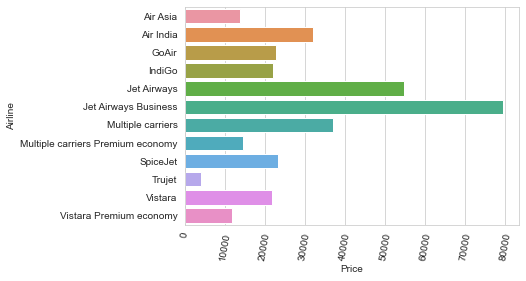

In [92]:
sns.barplot(y=New_df.index,x=New_df['Price'])
plt.xticks(rotation=80);

## Cleaning of data

* Handlinf of Date and Month

In [19]:
train_df['Journy_Month'] = pd.to_datetime(train_df.Date_of_Journey, format='%d/%m/%Y').dt.month

In [20]:
train_df['Journy_Day'] = pd.to_datetime(train_df.Date_of_Journey, format='%d/%m/%Y').dt.day

In [21]:
train_df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

   Journy_Month  Journy_Day  
0             3          24  
1             5           1  
2             6           9  
3             5          12  
4             3           1

In [22]:
train_df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [23]:
train_df.head()

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

   Arrival_Time Duration Total_Stops Additional_Info  Price  Journy_Month  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897             3   
1         13:15   7h 25m     2 stops         No info   7662             5   
2  04:25 10 Jun      19h     2 stops         No info  13882             6   
3         23:30   5h 25m      1 stop         No info   6218             5   
4         21:35   4h 45m      1 stop         No info  13302             3   

   Journy_Day  
0          24  
1           1  
2           9  
3          12  
4           1

In [24]:
## Departure time is when the plane leaves the gate
train_df['Dep_hour'] = pd.to_datetime(train_df.Dep_Time).dt.hour
train_df['Dep_min'] = pd.to_datetime(train_df.Dep_Time).dt.minute

In [25]:
train_df.head()

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

   Arrival_Time Duration Total_Stops Additional_Info  Price  Journy_Month  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897             3   
1         13:15   7h 25m     2 stops         No info   7662             5   
2  04:25 10 Jun      19h     2 stops         No info  13882             6   
3         23:30   5h 25m      1 stop         No info   6218             5   
4         21:35   4h 45m      1 stop         No info  13302             3   

   Journy_Day  Dep_hour  Dep_min  
0          24        22       20  
1           1         5       50  
2           9         9       25  
3          12        18        5  
4           1        16       50

In [26]:
train_df.drop(['Dep_Time'],axis=1,inplace=True)

In [27]:
train_df.head(1)

Airline    Source Destination      Route  Arrival_Time Duration Total_Stops  \
0  IndiGo  Banglore   New Delhi  BLR → DEL  01:10 22 Mar   2h 50m    non-stop   

  Additional_Info  Price  Journy_Month  Journy_Day  Dep_hour  Dep_min  
0         No info   3897             3          24        22       20

In [28]:
## Now, handle the arrival time of the flights
train_df['Arrival_hour'] = pd.to_datetime(train_df.Arrival_Time).dt.hour
train_df['Arrival_min'] = pd.to_datetime(train_df.Arrival_Time).dt.minute

In [29]:
train_df.head(1)

Airline    Source Destination      Route  Arrival_Time Duration Total_Stops  \
0  IndiGo  Banglore   New Delhi  BLR → DEL  01:10 22 Mar   2h 50m    non-stop   

  Additional_Info  Price  Journy_Month  Journy_Day  Dep_hour  Dep_min  \
0         No info   3897             3          24        22       20   

   Arrival_hour  Arrival_min  
0             1           10

In [30]:
train_df.drop(['Arrival_Time'],axis=1,inplace=True)

In [31]:
train_df.head(1)

Airline    Source Destination      Route Duration Total_Stops  \
0  IndiGo  Banglore   New Delhi  BLR → DEL   2h 50m    non-stop   

  Additional_Info  Price  Journy_Month  Journy_Day  Dep_hour  Dep_min  \
0         No info   3897             3          24        22       20   

   Arrival_hour  Arrival_min  
0             1           10

In [32]:
#train_df['Minutes']=train_df['Duration'].apply(lambda x:x.split(' ')[-1])

In [33]:
## Time taken to reach destination is called Duration
## It is difference between Departure Time and Arrival Time

## Assigning and converting Duration column into list
duration = list(train_df.Duration)

for i in range(len(duration)):
    if len(duration[i].split()) != 2:                       # Check if duration contains only hour or mins
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  # Adding 0 mins
        else:
            duration[i] = "0h " + duration[i]


duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split("h")[0]))    # Extract hours from Duration
    duration_mins.append(int(duration[i].split('m')[0].split()[-1]))  # Extract onlye minutes from Duration
    

In [34]:
train_df["Duration_hour"]  = duration_hours
train_df['Duration_mins'] = duration_mins

In [35]:
train_df.tail()

Airline    Source Destination                  Route Duration  \
10678     Air Asia   Kolkata    Banglore              CCU → BLR   2h 30m   
10679    Air India   Kolkata    Banglore              CCU → BLR   2h 35m   
10680  Jet Airways  Banglore       Delhi              BLR → DEL       3h   
10681      Vistara  Banglore   New Delhi              BLR → DEL   2h 40m   
10682    Air India     Delhi      Cochin  DEL → GOI → BOM → COK   8h 20m   

      Total_Stops Additional_Info  Price  Journy_Month  Journy_Day  Dep_hour  \
10678    non-stop         No info   4107             4           9        19   
10679    non-stop         No info   4145             4          27        20   
10680    non-stop         No info   7229             4          27         8   
10681    non-stop         No info  12648             3           1        11   
10682     2 stops         No info  11753             5           9        10   

       Dep_min  Arrival_hour  Arrival_min  Duration_hour  Duration_mins  
10678       55            22           25              2             30  
10679       45            23           20              2             35  
10680       20            11           20              3              0  
10681       30            14           10              2             40  
10682       55            19           15              8             20

In [36]:
train_df.drop(['Duration'],axis=1,inplace=True)

In [37]:
train_df.head(1)

Airline    Source Destination      Route Total_Stops Additional_Info  Price  \
0  IndiGo  Banglore   New Delhi  BLR → DEL    non-stop         No info   3897   

   Journy_Month  Journy_Day  Dep_hour  Dep_min  Arrival_hour  Arrival_min  \
0             3          24        22       20             1           10   

   Duration_hour  Duration_mins  
0              2             50

## Handling of catagorical data

In [39]:
train_df.Airline.value_counts()
#train_df[train_df['Airline']=='Trujet']

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

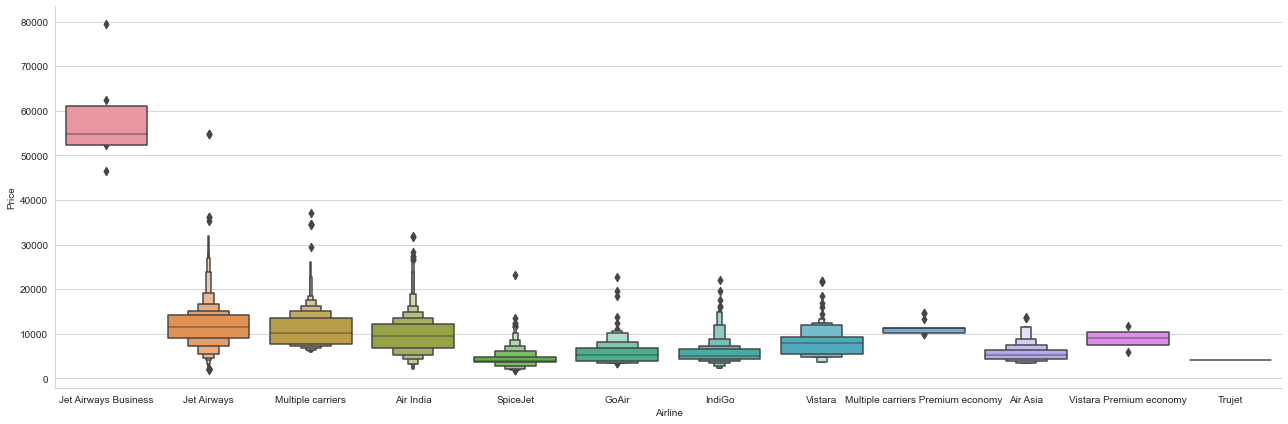

In [40]:
sns.catplot(x="Airline",y="Price", data=train_df.sort_values("Price",ascending=False), kind='boxen',height=6, aspect=3)

In [41]:
len(train_df['Airline'].unique())

12

* From the above plot, we can see that there are only 12 different flights

In [42]:
Airline = train_df[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               1                    0   
1                  1              0               0                    0   
2                  0              0               0                    1   
3                  0              0               1                    0   
4                  0              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  
0               0                0                                0  
1               0                0                                0  
2               0                0                                0  
3               0                0                                0  
4               0                0                                0

In [43]:
train_df.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

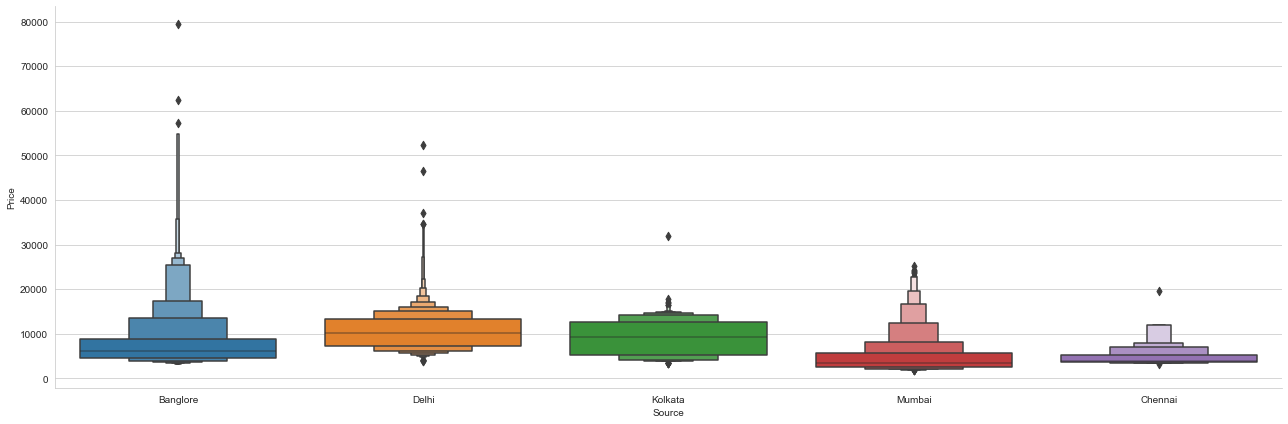

In [44]:
sns.catplot(x="Source",y="Price",data=train_df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)

In [45]:
Source = train_df[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source.head(1)

Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai
0               0             0               0              0

In [46]:
Destination = train_df[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head(1)

Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      1

In [47]:
train_df.Route

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [48]:
a = train_df.Additional_Info=='No info'

In [49]:
a.sum()

8344

In [50]:
a.mean()

0.781127129750983

## Additional_Info contains almost 80% no info
    * Route and Total_stops are related to each other
    * So can drop columns of Route and Additional_Info




In [51]:
train_df.drop(['Route','Additional_Info'], axis=1, inplace=True)

In [52]:
train_df.head()

Airline    Source Destination Total_Stops  Price  Journy_Month  \
0       IndiGo  Banglore   New Delhi    non-stop   3897             3   
1    Air India   Kolkata    Banglore     2 stops   7662             5   
2  Jet Airways     Delhi      Cochin     2 stops  13882             6   
3       IndiGo   Kolkata    Banglore      1 stop   6218             5   
4       IndiGo  Banglore   New Delhi      1 stop  13302             3   

   Journy_Day  Dep_hour  Dep_min  Arrival_hour  Arrival_min  Duration_hour  \
0          24        22       20             1           10              2   
1           1         5       50            13           15              7   
2           9         9       25             4           25             19   
3          12        18        5            23           30              5   
4           1        16       50            21           35              4   

   Duration_mins  
0             50  
1             25  
2              0  
3             25  
4             45

In [53]:
train_df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [54]:
## As this is case of ordinal categorical type we perform labelencoder
## Here values are assigned with corresponding keys

train_df.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4}, inplace=True)

In [55]:
train_df.head()

Airline    Source Destination  Total_Stops  Price  Journy_Month  \
0       IndiGo  Banglore   New Delhi            0   3897             3   
1    Air India   Kolkata    Banglore            2   7662             5   
2  Jet Airways     Delhi      Cochin            2  13882             6   
3       IndiGo   Kolkata    Banglore            1   6218             5   
4       IndiGo  Banglore   New Delhi            1  13302             3   

   Journy_Day  Dep_hour  Dep_min  Arrival_hour  Arrival_min  Duration_hour  \
0          24        22       20             1           10              2   
1           1         5       50            13           15              7   
2           9         9       25             4           25             19   
3          12        18        5            23           30              5   
4           1        16       50            21           35              4   

   Duration_mins  
0             50  
1             25  
2              0  
3             25  
4             45

In [56]:
## Now concat train_df, Airline, Source, Destination

data_train = pd.concat([train_df, Airline, Source, Destination], axis=1)
data_train.head()

Airline    Source Destination  Total_Stops  Price  Journy_Month  \
0       IndiGo  Banglore   New Delhi            0   3897             3   
1    Air India   Kolkata    Banglore            2   7662             5   
2  Jet Airways     Delhi      Cochin            2  13882             6   
3       IndiGo   Kolkata    Banglore            1   6218             5   
4       IndiGo  Banglore   New Delhi            1  13302             3   

   Journy_Day  Dep_hour  Dep_min  Arrival_hour  ...  \
0          24        22       20             1  ...   
1           1         5       50            13  ...   
2           9         9       25             4  ...   
3          12        18        5            23  ...   
4           1        16       50            21  ...   

   Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
0                                0               0             0   
1                                0               0             0   
2                                0               0             1   
3                                0               0             0   
4                                0               0             0   

   Source_Kolkata  Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0               0              0                   0                  0   
1               1              0                   0                  0   
2               0              0                   1                  0   
3               1              0                   0                  0   
4               0              0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      1  

[5 rows x 33 columns]

In [57]:
# Now drop Airline, Source, Destination

data_train.drop(['Destination','Source','Airline'], axis=1, inplace=True)
data_train.head()

Total_Stops  Price  Journy_Month  Journy_Day  Dep_hour  Dep_min  \
0            0   3897             3          24        22       20   
1            2   7662             5           1         5       50   
2            2  13882             6           9         9       25   
3            1   6218             5          12        18        5   
4            1  13302             3           1        16       50   

   Arrival_hour  Arrival_min  Duration_hour  Duration_mins  ...  \
0             1           10              2             50  ...   
1            13           15              7             25  ...   
2             4           25             19              0  ...   
3            23           30              5             25  ...   
4            21           35              4             45  ...   

   Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
0                                0               0             0   
1                                0               0             0   
2                                0               0             1   
3                                0               0             0   
4                                0               0             0   

   Source_Kolkata  Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0               0              0                   0                  0   
1               1              0                   0                  0   
2               0              0                   1                  0   
3               1              0                   0                  0   
4               0              0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      1  

[5 rows x 30 columns]

In [58]:
data_train.shape

(10682, 30)

In [59]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journy_Month', 'Journy_Day', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [60]:
data_train=data_train[['Total_Stops', 'Price', 'Journy_Month', 'Journy_Day', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

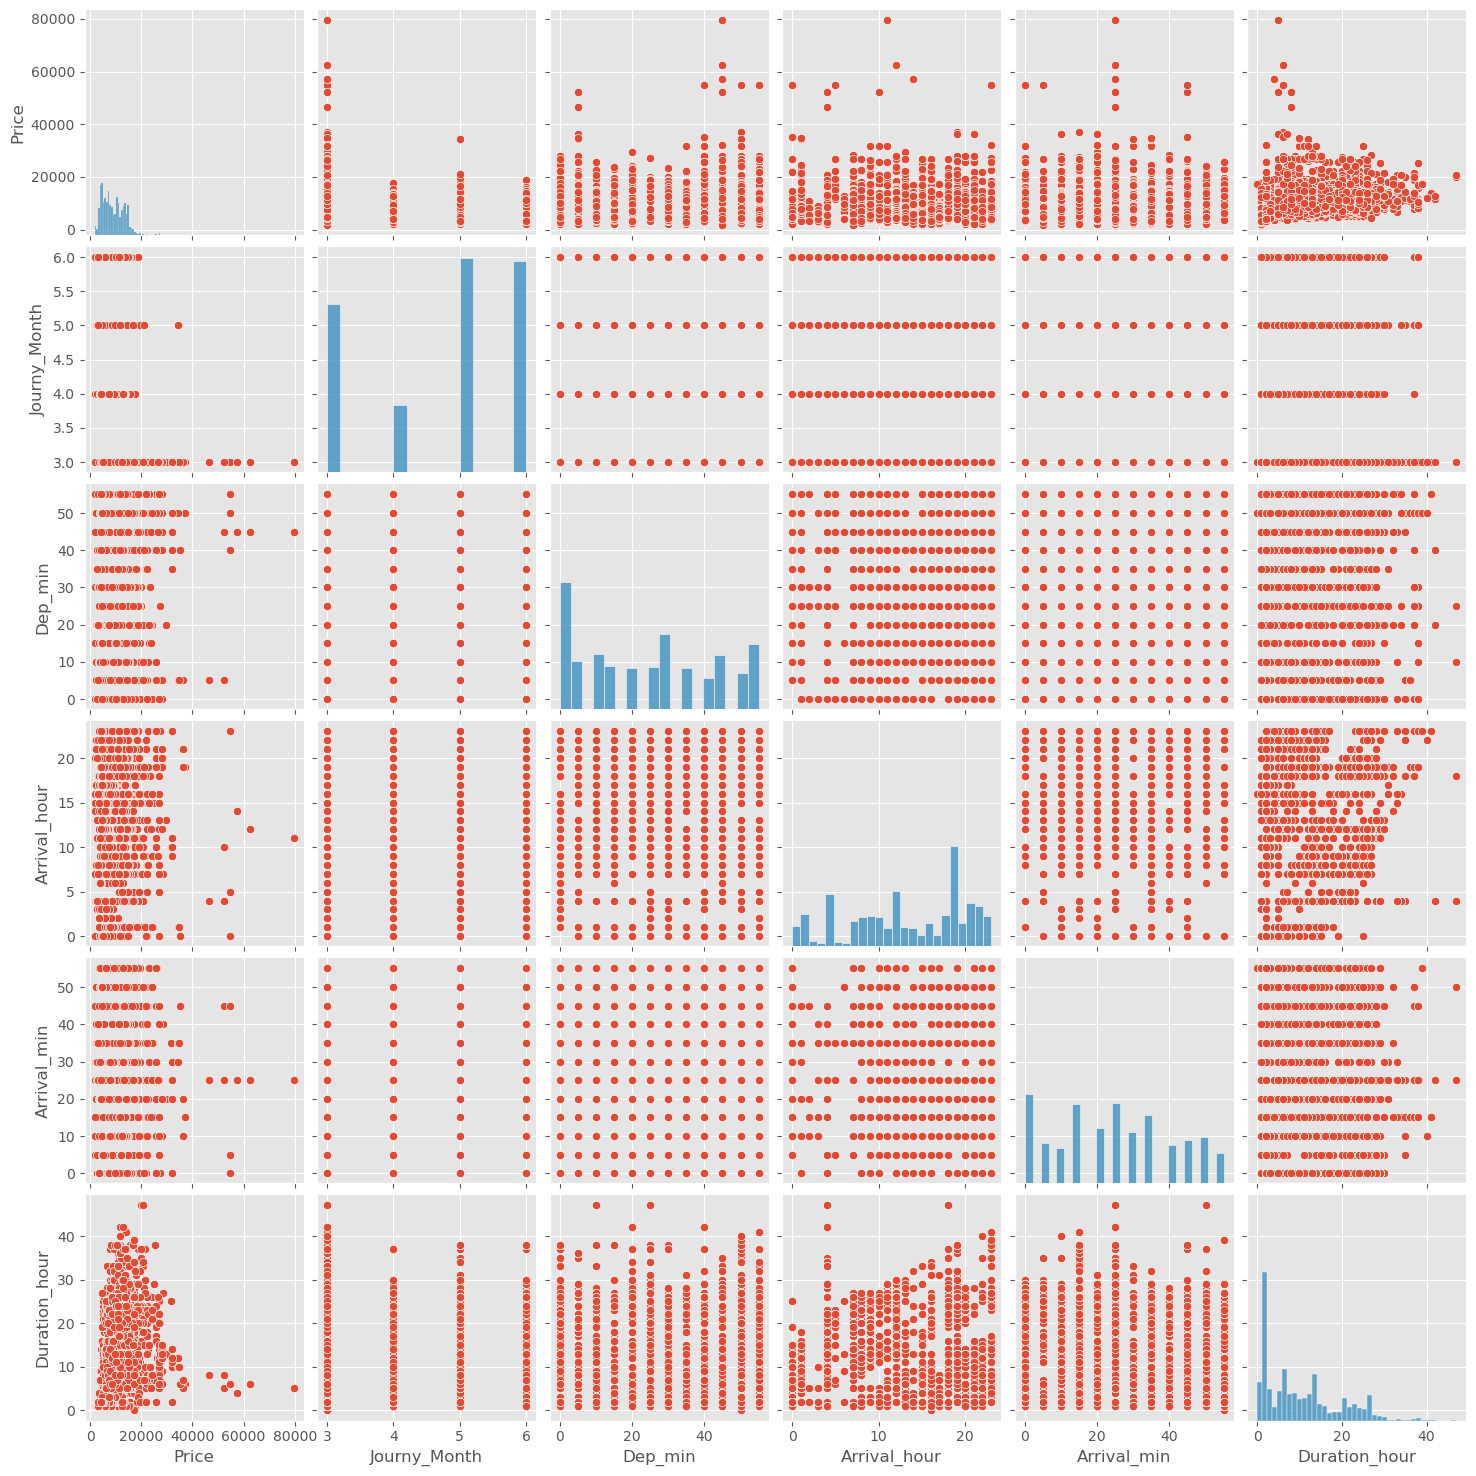

In [159]:
sns.pairplot(data=data_train[['Price', 'Journy_Month', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour']])
plt.savefig('pair_plot1.png', dpi=400)

### Feature Selection

In [62]:
data_train.head()

Total_Stops  Price  Journy_Month  Journy_Day  Dep_hour  Dep_min  \
0            0   3897             3          24        22       20   
1            2   7662             5           1         5       50   
2            2  13882             6           9         9       25   
3            1   6218             5          12        18        5   
4            1  13302             3           1        16       50   

   Arrival_hour  Arrival_min  Duration_hour  Duration_mins  ...  \
0             1           10              2             50  ...   
1            13           15              7             25  ...   
2             4           25             19              0  ...   
3            23           30              5             25  ...   
4            21           35              4             45  ...   

   Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
0                                0               0             0   
1                                0               0             0   
2                                0               0             1   
3                                0               0             0   
4                                0               0             0   

   Source_Kolkata  Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0               0              0                   0                  0   
1               1              0                   0                  0   
2               0              0                   1                  0   
3               1              0                   0                  0   
4               0              0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      1  

[5 rows x 29 columns]

In [63]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journy_Month', 'Journy_Day', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

## Now Make inputs which are used in predicition of price

In [96]:
X = data_train.loc[:, ['Total_Stops', 'Journy_Day', 'Journy_Month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
                       'Arrival_min','Duration_hour', 'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
                      'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers',
                      'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
                      'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
                      'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
                      'Destination_New Delhi']]

In [97]:
X.head(3)

Total_Stops  Journy_Day  Journy_Month  Dep_hour  Dep_min  Arrival_hour  \
0            0          24             3        22       20             1   
1            2           1             5         5       50            13   
2            2           9             6         9       25             4   

   Arrival_min  Duration_hour  Duration_mins  Airline_Air India  ...  \
0           10              2             50                  0  ...   
1           15              7             25                  1  ...   
2           25             19              0                  0  ...   

   Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
0                                0               0             0   
1                                0               0             0   
2                                0               0             1   

   Source_Kolkata  Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0               0              0                   0                  0   
1               1              0                   0                  0   
2               0              0                   1                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  

[3 rows x 28 columns]

In [98]:
X.shape

(10682, 28)

## Defining the target

In [99]:
y = data_train.iloc[:,1]
y.shape

(10682,)

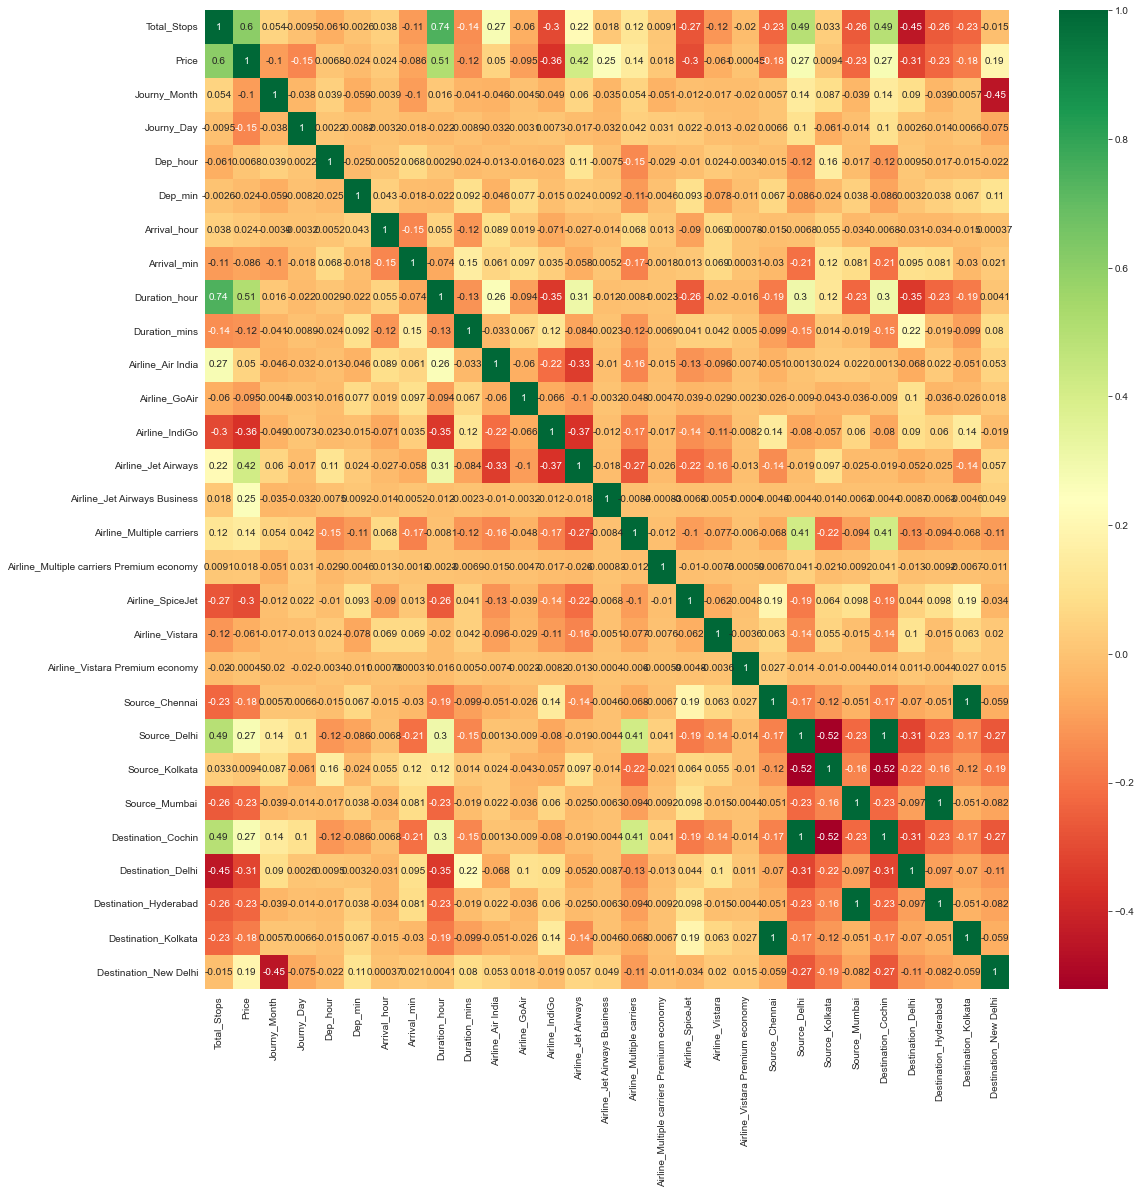

In [108]:
plt.figure(figsize=(18,18))
heat_map=sns.heatmap(data_train.corr(), annot=True,cmap='RdYlGn')
plt.savefig('heat_Map.png', dpi=400)

**Since in above heatmap no any two variables have correlation more than 0.90 so can not further reduce the model**

In [113]:
## Important feature using ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [114]:
print(selection.feature_importances_)

[2.39808337e-01 1.43984523e-01 5.32276428e-02 2.43679836e-02
 2.05723868e-02 2.85219908e-02 1.93739905e-02 1.24671823e-01
 1.78744424e-02 9.00519963e-03 2.08187382e-03 1.94274231e-02
 1.29403965e-01 6.65961841e-02 1.97443837e-02 8.15288947e-04
 3.11575300e-03 4.92575313e-03 8.39242048e-05 5.60643499e-04
 2.94855139e-03 3.17257675e-03 6.43308113e-03 1.34445373e-02
 1.39999935e-02 6.46255610e-03 5.22735761e-04 2.48524568e-02]


<AxesSubplot:>

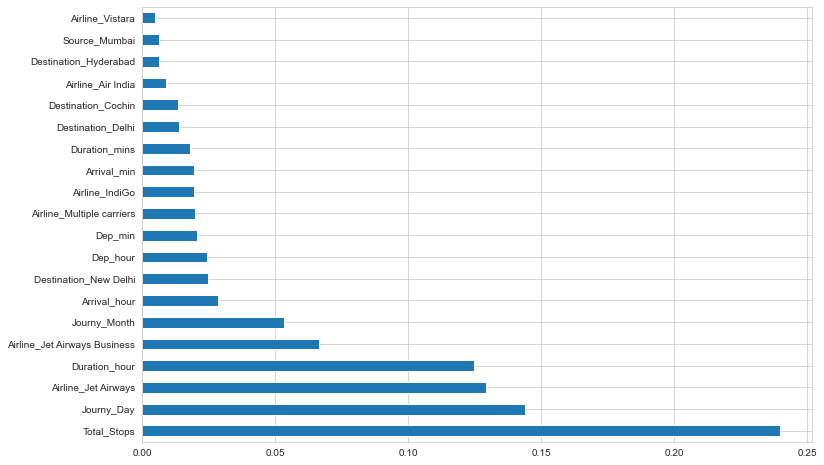

In [115]:
plt.figure(figsize=(12,8))
feature_imp = pd.Series(selection.feature_importances_, index = X.columns)
feature_imp.nlargest(20).plot(kind='barh')

### Training part

In [126]:
# spliting data into train and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

`Now Fitting a Linear model on the cleaned data`

## Linear Regression

In [127]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [128]:
predictions = model.predict(X_test)

In [129]:
predictions

array([13339.64528215,  7639.23527309,  9606.14423889, ...,
        6767.26520434, 11226.34308429, 11576.25376313])

In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(y_test,predictions))
print(mean_squared_error(y_test,predictions))
print(r2_score(y_test,predictions))

1972.8693700484098
8202143.051591621
0.6196029298745246


## Ridge Regression

In [146]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.5)
ridge.fit(X_train,y_train)
y_preds_ridge = ridge.predict(X_test)

In [147]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(y_test,y_preds_ridge))
print(mean_squared_error(y_test,y_preds_ridge))
print(r2_score(y_test,y_preds_ridge))

1974.7477929370816
8206720.4998938
0.6193906380488581


## Lasso Regression

In [148]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
y_preds_lasso = ridge.predict(X_test)

In [149]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(y_test,y_preds_lasso))
print(mean_squared_error(y_test,y_preds_lasso))
print(r2_score(y_test,y_preds_lasso))

1974.7477929370816
8206720.4998938
0.6193906380488581


## Error Distribution

In [151]:
import numpy as np
errors = (predictions - y_test)
np.mean(errors)

13.307866926343783

In [152]:
np.std(errors)

2863.9074622392222

C:\Users\tarac\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Error Distribution')

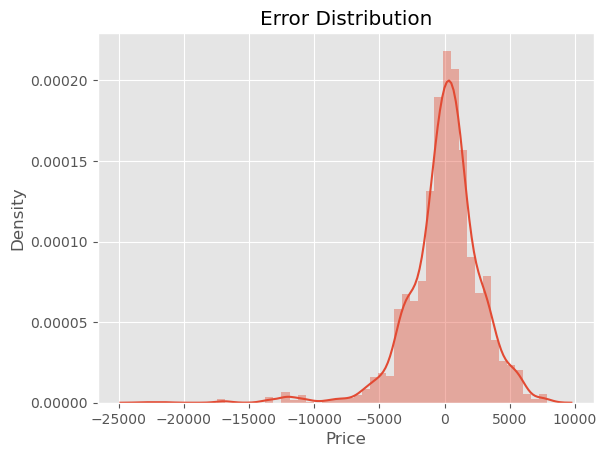

In [155]:
sns.distplot(errors)
plt.title('Error Distribution')

## Hypothesis Testing

In [131]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)

lm = sm.OLS(y_train,X_train_lm).fit();

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     589.3
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        21:49:34   Log-Likelihood:                -80018.
No. Observations:                8545   AIC:                         1.601e+05
Df Residuals:                    8520   BIC:                         1.603e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [132]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values.sort_index(ascending=False)

Total_Stops                                  1.847639e-270
Source_Mumbai                                 0.000000e+00
Source_Kolkata                                0.000000e+00
Source_Delhi                                 1.561880e-300
Source_Chennai                                0.000000e+00
Journy_Month                                  1.134101e-06
Journy_Day                                    0.000000e+00
Duration_mins                                 0.000000e+00
Duration_hour                                 0.000000e+00
Destination_New Delhi                         0.000000e+00
Destination_Kolkata                           0.000000e+00
Destination_Hyderabad                         0.000000e+00
Destination_Delhi                             0.000000e+00
Destination_Cochin                           1.561880e-300
Dep_min                                       0.000000e+00
Dep_hour                                      0.000000e+00
Arrival_min                                   0.000000e+

**Since all the p values are significantly less therefore the null hypothesis is rejected and there for above model is final model for the prediction of flight fare**

In [142]:
model.coef_

array([ 2.75476259e+03, -7.24536974e+01, -4.24815911e+02,  2.02492235e+01,
       -2.12543082e+00, -1.17292437e+01,  2.22821106e+00,  2.63281723e+00,
       -1.88667696e+00,  1.67181692e+03,  2.13272987e+02,  2.40424795e+02,
        4.37994485e+03,  4.77657810e+04,  3.71781078e+03,  4.07498953e+03,
       -2.35625883e+02,  2.08984824e+03,  3.09345565e+03,  8.22578807e+00,
        5.78083506e+01,  8.03889745e+00, -8.24935095e+02,  5.78083506e+01,
       -8.36169560e+02, -8.24935095e+02,  8.22578807e+00,  1.58703162e+03])

In [134]:
model.intercept_

7314.910284351206

In [162]:
equation=[]
for coeff,col in zip(model.coef_,X_train.columns):
    equation.append(str(round(coeff,2))+'*'+str(col))
print('y='+'+'.join(equation)+'+'+str(round(model.intercept_,2)))

y=2754.76*Total_Stops+-72.45*Journy_Day+-424.82*Journy_Month+20.25*Dep_hour+-2.13*Dep_min+-11.73*Arrival_hour+2.23*Arrival_min+2.63*Duration_hour+-1.89*Duration_mins+1671.82*Airline_Air India+213.27*Airline_GoAir+240.42*Airline_IndiGo+4379.94*Airline_Jet Airways+47765.78*Airline_Jet Airways Business+3717.81*Airline_Multiple carriers+4074.99*Airline_Multiple carriers Premium economy+-235.63*Airline_SpiceJet+2089.85*Airline_Vistara+3093.46*Airline_Vistara Premium economy+8.23*Source_Chennai+57.81*Source_Delhi+8.04*Source_Kolkata+-824.94*Source_Mumbai+57.81*Destination_Cochin+-836.17*Destination_Delhi+-824.94*Destination_Hyderabad+8.23*Destination_Kolkata+1587.03*Destination_New Delhi+7314.91


## Predictions for some inputs

In [183]:
X_train.iloc[2].values.T

array([ 1, 24,  4, 15, 45, 22,  5,  6, 20,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0], dtype=int64)

In [190]:
X_train.head()

Total_Stops  Journy_Day  Journy_Month  Dep_hour  Dep_min  Arrival_hour  \
10005            1          27             5         8       30            19   
3684             1           9             5        11       30            12   
1034             1          24             4        15       45            22   
3909             1          21             3        12       50             1   
3088             2          24             6        17       15            19   

       Arrival_min  Duration_hour  Duration_mins  Airline_Air India  ...  \
10005           15             10             45                  0  ...   
3684            35             25              5                  0  ...   
1034             5              6             20                  0  ...   
3909            35             12             45                  0  ...   
3088            15             26              0                  1  ...   

       Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
10005                                0               0             1   
3684                                 0               0             1   
1034                                 0               0             1   
3909                                 0               0             1   
3088                                 0               0             1   

       Source_Kolkata  Source_Mumbai  Destination_Cochin  Destination_Delhi  \
10005               0              0                   1                  0   
3684                0              0                   1                  0   
1034                0              0                   1                  0   
3909                0              0                   1                  0   
3088                0              0                   1                  0   

       Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
10005                      0                    0                      0  
3684                       0                    0                      0  
1034                       0                    0                      0  
3909                       0                    0                      0  
3088                       0                    0                      0  

[5 rows x 28 columns]

In [185]:
output_1 = model.predict(X_train.iloc[2].values.reshape(1, -1))

C:\Users\tarac\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [186]:
output_1

array([6450.76633517])

In [191]:
y_train.loc[1034]

5583